In [1]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [2]:
# Data retrieved from S3 bucket. 
url_completetable = "https://horse-races.s3.ca-central-1.amazonaws.com/nyra_2019_complete.csv"
colnames = ['track_id', 'race_date', 'race_number', 'program_number', 'trakus_index', 'latitude', 'longitude', 'distance_id', 'course_type', 'track_condition', 'run_up_distance', 'race_type', 'purse', 'post_time', 'weight_carried', 'jockey', 'odds', 'position_at_finish']
full = pd.read_csv(url_completetable, header=None, names=colnames)
full.head()

/var/folders/jg/6trrgcbd7s94jnb11pjg88rr0000gn/T/ipykernel_12549/339673264.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv(url_completetable, header=None, names=colnames)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [3]:
data = pd.DataFrame(full)
data.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [ ]:
# Used at various points to generate jockey names.
data.sample(n=5)

In [4]:
# Data cleaned before modeling
data_joel = data[data['jockey'] == 'Joel Rosario']  
data_joel_drop = data_joel.drop_duplicates(subset=['jockey','race_number', 'program_number', 'race_date', 'track_id'])
data_joel_drop

data_eric = data[data['jockey'] == 'Eric Cancel']  
data_eric_drop = data_eric.drop_duplicates(subset=['jockey','race_number', 'program_number', 'race_date', 'track_id'])

data_manuel = data[data['jockey'] == 'Manuel Franco'] 
data_manuel_drop = data_manuel.drop_duplicates(subset=['jockey','race_number', 'program_number', 'race_date', 'track_id'])

data_andre = data[data['jockey'] == 'Andre Shivnarine Worrie'] 
data_andre_drop = data_andre.drop_duplicates(subset=['jockey','race_number', 'program_number', 'race_date', 'track_id'])

data_reylu = data[data['jockey'] == 'Reylu Gutierrez']  
data_reylu_drop = data_reylu.drop_duplicates(subset=['jockey','race_number', 'program_number', 'race_date', 'track_id'])


data_reduced = pd.concat([data_joel_drop, data_eric_drop, data_manuel_drop, data_andre_drop, data_reylu_drop], ignore_index=True, sort=False)

data_reduced = data_reduced.drop(columns = ['race_date', 'latitude', 'longitude', 'trakus_index','program_number', 'distance_id', 'run_up_distance', 'purse', 'post_time', 'odds'])
data_reduced

# Top Importance: 0(track_id), 1(race_date), 2(race_number), 5(course_type), 6(track_condition) 8(race_type), 11(weight), 12(jockey)

,track_id,race_number,course_type,track_condition,race_type,weight_carried,jockey,position_at_finish
0,BEL,6,T,GD,CLM,124,Joel Rosario,8
1,BEL,7,D,FT,CLM,122,Joel Rosario,5
2,BEL,3,D,FT,CLM,124,Joel Rosario,5
3,BEL,7,T,FM,CLM,123,Joel Rosario,5
4,SAR,6,D,FT,CLM,122,Joel Rosario,2
...,...,...,...,...,...,...,...,...
3196,AQU,8,D,SY,MCL,119,Reylu Gutierrez,3
3197,AQU,6,D,FT,MCL,119,Reylu Gutierrez,11
3198,AQU,5,D,FT,MSW,119,Reylu Gutierrez,10
3199,AQU,8,D,MY,MCL,119,Reylu Gutierrez,7


In [ ]:
# # Correlationations

# corr1 = data_reduced['track_id'].corr(data_reduced['race_number'])
# corr1

In [5]:
# Data cleaned before evaluating
data_dummies = pd.get_dummies(data_reduced)
data_dummies

,race_number,weight_carried,position_at_finish,track_id_AQU,track_id_BEL,track_id_SAR,course_type_D,course_type_I,course_type_O,course_type_T,...,race_type_SST,race_type_STK,race_type_STR,race_type_WCL,race_type_WMC,jockey_Andre Shivnarine Worrie,jockey_Eric Cancel,jockey_Joel Rosario,jockey_Manuel Franco,jockey_Reylu Gutierrez
0,6,124,8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,7,122,5,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,124,5,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7,123,5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,6,122,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,8,119,3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3197,6,119,11,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3198,5,119,10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3199,8,119,7,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
dummies_dropped = data_dummies.drop(columns=['position_at_finish'])
dummies_dropped

,race_number,weight_carried,track_id_AQU,track_id_BEL,track_id_SAR,course_type_D,course_type_I,course_type_O,course_type_T,track_condition_FM,...,race_type_SST,race_type_STK,race_type_STR,race_type_WCL,race_type_WMC,jockey_Andre Shivnarine Worrie,jockey_Eric Cancel,jockey_Joel Rosario,jockey_Manuel Franco,jockey_Reylu Gutierrez
0,6,124,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,7,122,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,124,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7,123,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,6,122,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,8,119,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3197,6,119,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3198,5,119,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3199,8,119,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X = dummies_dropped.values[:, :30]  
y = data_dummies.values[:, 2]   

In [8]:
print(y)

[ 8  5  5 ... 10  7 12]


In [9]:
print(X)

[[  6 124   0 ...   0   0   0]
 [  7 122   0 ...   0   0   0]
 [  3 124   0 ...   0   0   0]
 ...
 [  5 119   1 ...   0   0   0]
 [  8 119   1 ...   0   0   0]
 [  8 120   1 ...   0   0   0]]


In [10]:
for i in range(5):
    print('X =', X[i], ', y =', y[i])

X = [  6 124   0   1   0   0   0   0   1   0   0   1   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0] , y = 8
X = [  7 122   0   1   0   1   0   0   0   0   1   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0] , y = 5
X = [  3 124   0   1   0   1   0   0   0   0   1   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0] , y = 5
X = [  7 123   0   1   0   0   0   0   1   1   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0] , y = 5
X = [  6 122   0   0   1   1   0   0   0   0   1   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0] , y = 2


In [11]:
# Script initialized model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Script trains model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [14]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.06879650700198192
The test score for lr model is 0.05938892705036369


In [21]:
# get importance
importance = lr.coef_
intercept = lr.intercept_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Coefficient: %.5f' % (i,v))

print('Intercept: ', intercept)


# plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature: 0, Coefficient: 0.37822
Feature: 1, Coefficient: -0.14056
Feature: 2, Coefficient: 3573379097558.17822
Feature: 3, Coefficient: 3388561589672.01904
Feature: 4, Coefficient: 2633833600619.16797
Feature: 5, Coefficient: -1110882424136.32837
Feature: 6, Coefficient: -753531566885.08301
Feature: 7, Coefficient: -464972249601.37152
Feature: 8, Coefficient: -887850326681.21240
Feature: 9, Coefficient: -2167769456521.12085
Feature: 10, Coefficient: -2614682000605.80322
Feature: 11, Coefficient: -1723221364608.61621
Feature: 12, Coefficient: -994192434716.31494
Feature: 13, Coefficient: -151002033764.62143
Feature: 14, Coefficient: -1685119644392.63257
Feature: 15, Coefficient: -717505698272.13525
Feature: 16, Coefficient: 1091545648569.77942
Feature: 17, Coefficient: 1141255593030.55615
Feature: 18, Coefficient: 1527744902316.84399
Feature: 19, Coefficient: 1392882600388.05957
Feature: 20, Coefficient: 1527744902316.82104
Feature: 21, Coefficient: 129524497876.40407
Feature: 22, Coef

In [16]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.06880016217252205
The test score for ridge model is 0.05920292026206697


In [17]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0011198358771984385


In [18]:
 model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Script evaluates model. 
# Model optimization and evaluation process shown in Model_Iterations.csv and Old_Models folder.
# Predive power below 75%; however, a lower predictive power is to be expected given the nature of horse racing. 
model.score(X_test, y_test) 

0.05938892705036369

In [ ]:
# Scaling didn't change the model score 

In [20]:
# get importance
importance = model.coef_
intercept = model.intercept_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Coefficient: %.5f' % (i,v))

print('Intercept: ', intercept)


# plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature: 0, Coefficient: 0.37822
Feature: 1, Coefficient: -0.14056
Feature: 2, Coefficient: 3573379097558.17822
Feature: 3, Coefficient: 3388561589672.01904
Feature: 4, Coefficient: 2633833600619.16797
Feature: 5, Coefficient: -1110882424136.32837
Feature: 6, Coefficient: -753531566885.08301
Feature: 7, Coefficient: -464972249601.37152
Feature: 8, Coefficient: -887850326681.21240
Feature: 9, Coefficient: -2167769456521.12085
Feature: 10, Coefficient: -2614682000605.80322
Feature: 11, Coefficient: -1723221364608.61621
Feature: 12, Coefficient: -994192434716.31494
Feature: 13, Coefficient: -151002033764.62143
Feature: 14, Coefficient: -1685119644392.63257
Feature: 15, Coefficient: -717505698272.13525
Feature: 16, Coefficient: 1091545648569.77942
Feature: 17, Coefficient: 1141255593030.55615
Feature: 18, Coefficient: 1527744902316.84399
Feature: 19, Coefficient: 1392882600388.05957
Feature: 20, Coefficient: 1527744902316.82104
Feature: 21, Coefficient: 129524497876.40407
Feature: 22, Coef

In [ ]:
# Features linked to headers of dummies_dropped

In [ ]:
# Equation: 
# 0.18520(race_number) - 0.09951(avg(weight_carried) + tack_id_coefficient + course_type_coefficient + track_condition_coefficient + race_type_coefficient + jockey_coefficient + 16.883959286386713


In [44]:
Xnew = [[2, 120, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

X=[[2, 120, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]], Predicted=[6.55144314]


In [ ]:
# JavaScript will need to round the predicted position.
# Always round up because you can't be in place 0? 

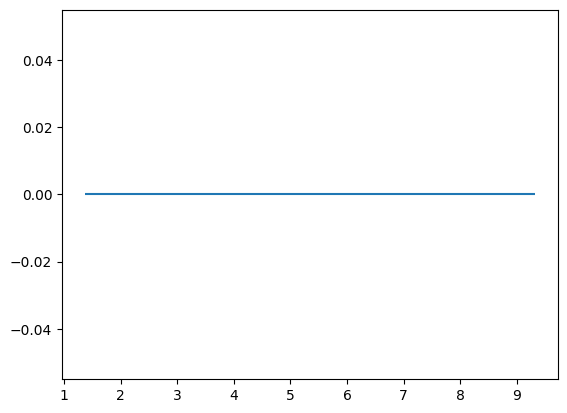

In [56]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [ ]:
r = np.corrcoef(x, y)